<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Constructing an optimal portfolio

In [1]:
import pandas_datareader.data as web
import numpy as np, pandas as pd, scipy as sp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
p = print

In [2]:
# Load the data
df = pd.read_csv('MSFT_IBM.csv', index_col='Date', parse_dates=True)

In [3]:
# Make a list of names
tickers = df.columns

In [4]:
# Print a summry of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 2 columns):
IBM     2264 non-null float64
MSFT    2264 non-null float64
dtypes: float64(2)
memory usage: 53.1 KB


In [5]:
# Calculate the daily returns
returns = df.pct_change().dropna()

In [6]:
# Calculate mean and standard deviation of returns
mean_return = returns.mean()
return_stdev = returns.std()

In [7]:
# Calculate the covariance of returns
cov_matrix = returns.cov()

In [8]:
# Hypothetical risk-free rate of return
rf = 0.00003

In [9]:
# Set the number of simulations
num_portfolios = 25000

# Initialize simulatio results to all zeros
results = np.zeros((3 + len(tickers), num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    # Normalize the weights and set the sum to 1
    weights /= np.sum(weights)
    
    # Calculate the portfolio return
    portfolio_return = weights.T.dot(mean_return * 252)
    # Calculate the portfolio volatility
    portfolio_stdev = np.sqrt(weights.T.dot(cov_matrix * 252).dot(weights))
    
    # Store the results in a defined array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    # Cacluate the Sharpe ratio and store the result in the array
    results[2,i] = (results[0,i] - rf) / results[1,i]
    
    # Save the weights in the array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [10]:
# Save the simulations in a dataframe
results_df = pd.DataFrame(results.T, columns=['Rets','Vol','Sharpe'] + [ticker for ticker in tickers])

In [11]:
# Print the first few rows
results_df.head()

,Rets,Vol,Sharpe,IBM,MSFT
0,0.084675,0.184967,0.457624,0.473542,0.526458
1,0.047141,0.180993,0.260293,0.713005,0.286995
2,0.044538,0.181272,0.245531,0.729614,0.270386
3,0.120822,0.201892,0.598297,0.242933,0.757067
4,0.026820,0.185048,0.144774,0.842650,0.157350


In [12]:
# Print the last few rows
results_df.tail()

,Rets,Vol,Sharpe,IBM,MSFT
24995,0.100327,0.190862,0.525497,0.373685,0.626315
24996,0.059030,0.180637,0.326620,0.637158,0.362842
24997,0.056190,0.180585,0.310992,0.655272,0.344728
24998,0.079104,0.183447,0.431044,0.509087,0.490913
24999,0.057286,0.180595,0.317041,0.648283,0.351717


In [13]:
# Locate the maximum Sharpe ratio portoflio
max_sharpe_port = results_df.iloc[results_df['Sharpe'].idxmax()]

# Locate the minimum volatility portfolio
min_vol_port = results_df.iloc[results_df['Vol'].idxmin()]

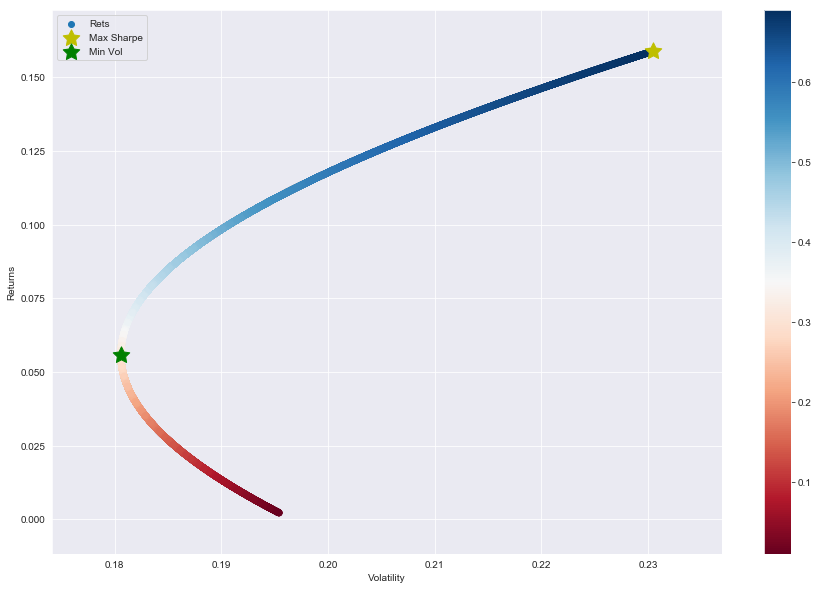

In [14]:
# Plot the efficient fronter with the maximum Sharpe and minimum volatility portfolios
plt.subplots(figsize=(15,10))
plt.scatter(results_df.Vol,results_df.Rets,c=results_df.Sharpe,cmap='RdBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar();
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='y',s=300, label='Max Sharpe')
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=300, label='Min Vol')
plt.legend();
plt.show()

In [15]:
# Print the maximum Sharpe ratio portfolio
max_sharpe_port

Rets      0.158894
Vol       0.230473
Sharpe    0.689297
IBM       0.000035
MSFT      0.999965
Name: 3125, dtype: float64

In [16]:
# Print the minimum volatility portfolio
min_vol_port

Rets      0.055883
Vol       0.180584
Sharpe    0.309288
IBM       0.657237
MSFT      0.342763
Name: 20350, dtype: float64

In [17]:
# Load the data
df = pd.read_csv('AAPL_MSFT_IBM_WMT.csv', index_col='Date', parse_dates=True)

In [18]:
# Print a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2010-01-04 to 2019-10-18
Data columns (total 4 columns):
AAPL    2466 non-null float64
IBM     2466 non-null float64
MSFT    2466 non-null float64
WMT     2466 non-null float64
dtypes: float64(4)
memory usage: 96.3 KB


In [19]:
# Make a list of stock names
tickers = df.columns

In [20]:
# Calculate the daily returns
returns = df.pct_change().dropna()

In [21]:
# Calculate the mean and standard deviation of returns
mean_return = returns.mean()
return_stdev = returns.std()

In [22]:
# Calcualte the covariance of returns
cov_matrix = returns.cov()

In [23]:
# Set the number of simulations
num_portfolios = 25000

# Initialize simulatio results to all zeros
results = np.zeros((3 + len(tickers), num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    # Normalize the weights and set the sum to 1
    weights /= np.sum(weights)
    
    # Calculate the portfolio return
    portfolio_return = weights.T.dot(mean_return * 252)
    # Calculate the portfolio volatility
    portfolio_stdev = np.sqrt(weights.T.dot(cov_matrix * 252).dot(weights))
    
    # Store the results in a defined array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    # Cacluate the Sharpe ratio and store the result in the array
    results[2,i] = (results[0,i] - rf) / results[1,i]
    
    # Save the weights in the array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [24]:
# Save the simulations in a dataframe
results_df = pd.DataFrame(results.T, columns=['Rets','Vol','Sharpe'] + [ticker for ticker in tickers])

In [25]:
# Print the first few rows
results_df.head()

,Rets,Vol,Sharpe,AAPL,IBM,MSFT,WMT
0,0.174108,0.171521,1.014907,0.378697,0.255105,0.239281,0.126917
1,0.128479,0.146295,0.878009,0.133499,0.338965,0.161051,0.366485
2,0.165430,0.151241,1.093620,0.248002,0.086132,0.208275,0.457591
3,0.158866,0.163849,0.969402,0.257141,0.299226,0.292332,0.151301
4,0.112450,0.144850,0.776113,0.089414,0.392886,0.084491,0.433209


In [26]:
# Print the last few results
results_df.tail()

,Rets,Vol,Sharpe,AAPL,IBM,MSFT,WMT
24995,0.138417,0.157015,0.881363,0.239315,0.400536,0.158370,0.201779
24996,0.157606,0.159547,0.987645,0.234342,0.271024,0.291087,0.203547
24997,0.190006,0.185106,1.026307,0.132510,0.039676,0.659249,0.168565
24998,0.162283,0.155094,1.046160,0.360308,0.135984,0.025923,0.477786
24999,0.134667,0.154176,0.873270,0.256748,0.401700,0.084895,0.256657


In [27]:
# Locate the maximum Sharpe ratio portoflio
max_sharpe_port = results_df.iloc[results_df['Sharpe'].idxmax()]

# Locate the minimum volatility portfolio
min_vol_port = results_df.iloc[results_df['Vol'].idxmin()]

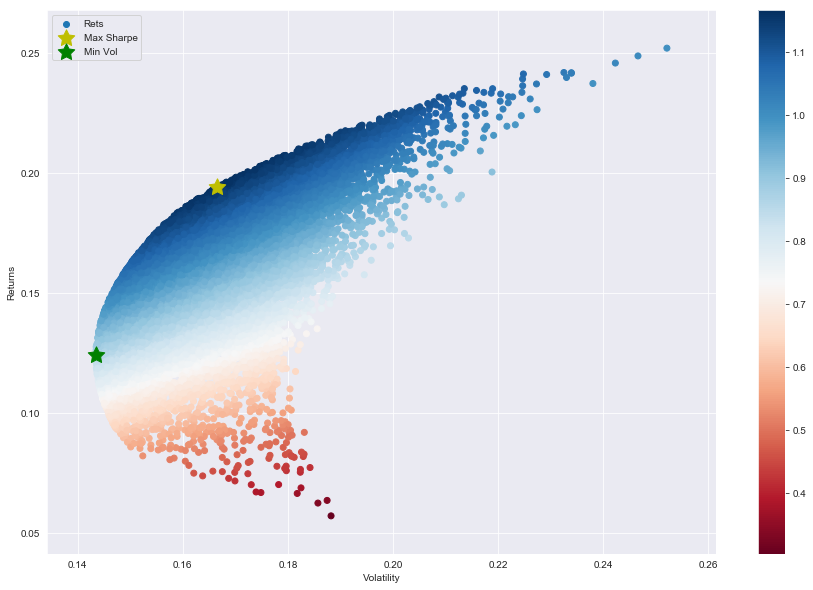

In [28]:
# Plot the efficient fronter with the maximum Sharpe and minimum volatility portfolios
plt.subplots(figsize=(15,10))
plt.scatter(results_df.Vol,results_df.Rets,c=results_df.Sharpe,cmap='RdBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar();
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='y',s=300, label='Max Sharpe')
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=300, label='Min Vol')
plt.legend();
plt.show()

In [29]:
# Print the maximum Sharpe ratio portfolio results
max_sharpe_port

Rets      0.194260
Vol       0.166489
Sharpe    1.166628
AAPL      0.376145
IBM       0.000139
MSFT      0.274327
WMT       0.349389
Name: 1157, dtype: float64

In [30]:
# Print the minimum volatility portfolio results
min_vol_port

Rets      0.124357
Vol       0.143442
Sharpe    0.866744
AAPL      0.111448
IBM       0.279430
MSFT      0.097460
WMT       0.511662
Name: 2772, dtype: float64